In [108]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
#Kmeans function
def kmeans(data, clusters_num):
  #scale data
  #scaler = StandardScaler()
  #data = scaler.fit_transform(data)
  
  #apply method
  km = KMeans(n_clusters = clusters_num)
  km.fit(data)
  
  pred = km.predict(data)
  centroids = km.cluster_centers_
  labels = km.labels_
  
  #plotting
  #sns.scatterplot(data[:,0], data[:,1], hue=pred)
  #sns.scatterplot(centroids[:,0], centroids[:,1], color='y', s=50)
  #plt.title('KMeans')
  #plt.show()
  
  #print(labels)
  return silhouette_score(data,labels)

In [110]:
#Hierarchical function
def hierar(data, clusters_num):
  #scale data
  #scaler = StandardScaler()
  #data = scaler.fit_transform(data)
  
  #apply method
  ac = AgglomerativeClustering(n_clusters = clusters_num)
  ac.fit(data)
  
  pred = ac.fit_predict(data)
  labels = ac.labels_
  
  #plotting
  #sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='Spectral')
  #plt.title('Hierarchical')
  #plt.show()
  
  #print(labels)
  return silhouette_score(data,labels)

In [235]:
#DBSCAN function
def dbscan(data, e, min_s):
  #scale data
  #scaler = StandardScaler()
  #data = scaler.fit_transform(data)
  
  #apply method
  db = DBSCAN(eps=e, min_samples=min_s)
  db.fit(data)
  
  pred = db.fit_predict(data)
  labels = db.labels_
  
  #plotting
  #sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='magma')
  #plt.title('DBSCAN')
  #plt.show()
  
  #print(labels)
  return silhouette_score(data,labels)

In [112]:
#Gaussian mixture
def gauss(data, comp_num):
  #scale data
  #scaler = StandardScaler()
  #data = scaler.fit_transform(data)
  
  #apply method
  gm = GaussianMixture(n_components=comp_num)
  gm.fit(data)
  
  pred = gm.predict(data)
  
  #plotting
  #sns.scatterplot(data[:,0], data[:,1], hue=pred, palette='magma')
  #plt.title('Gaussian Mixture')
  #plt.show()
  
  #print(pred)
  return silhouette_score(data,pred)

## Dataset

In [113]:
#preprocessing and pca
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [114]:
#read the data
data_path = 'Bank_Customer.csv' 
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [115]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [117]:
#Percentage of nulls
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [118]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [120]:
#fill the NaNs in the 2 columns CREDIT_LIMIT and MINIMUM_PAYMENTS by the mediam
df.fillna(df.median(), inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [122]:
columns = list(df.columns)[1:]
columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

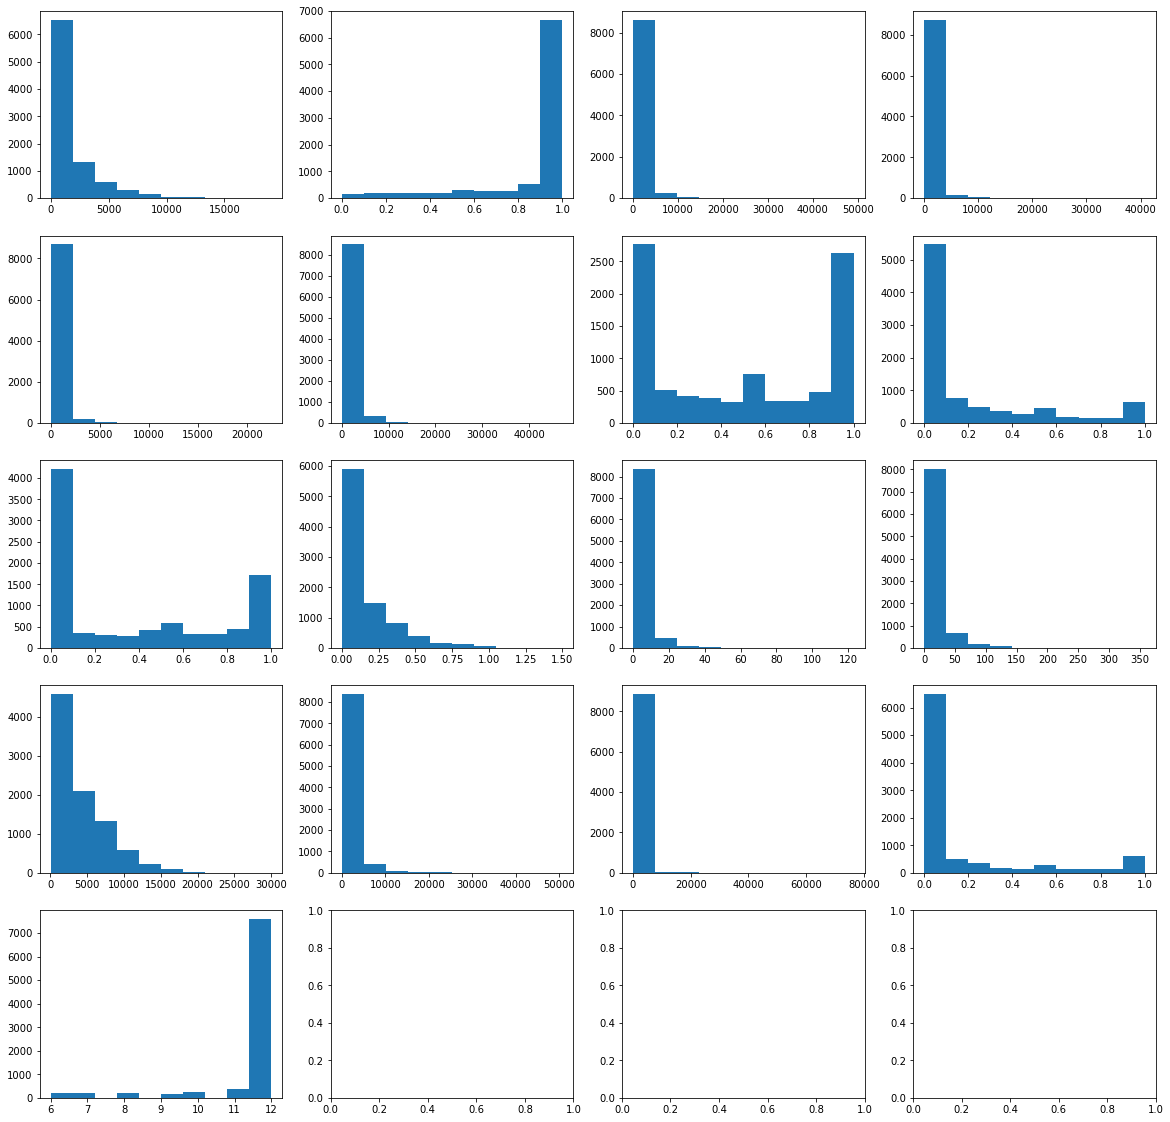

In [123]:
plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(nrows=5, ncols=4)
plot_num = 0
r = 0
c = 0

for x in range(5):
  for y in range(4):
    axes[r,c].hist(df[columns[plot_num]])
    plot_num+=1
    c+=1
    if x==4: break

  r+=1
  c=0
plt.show() 


In [124]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


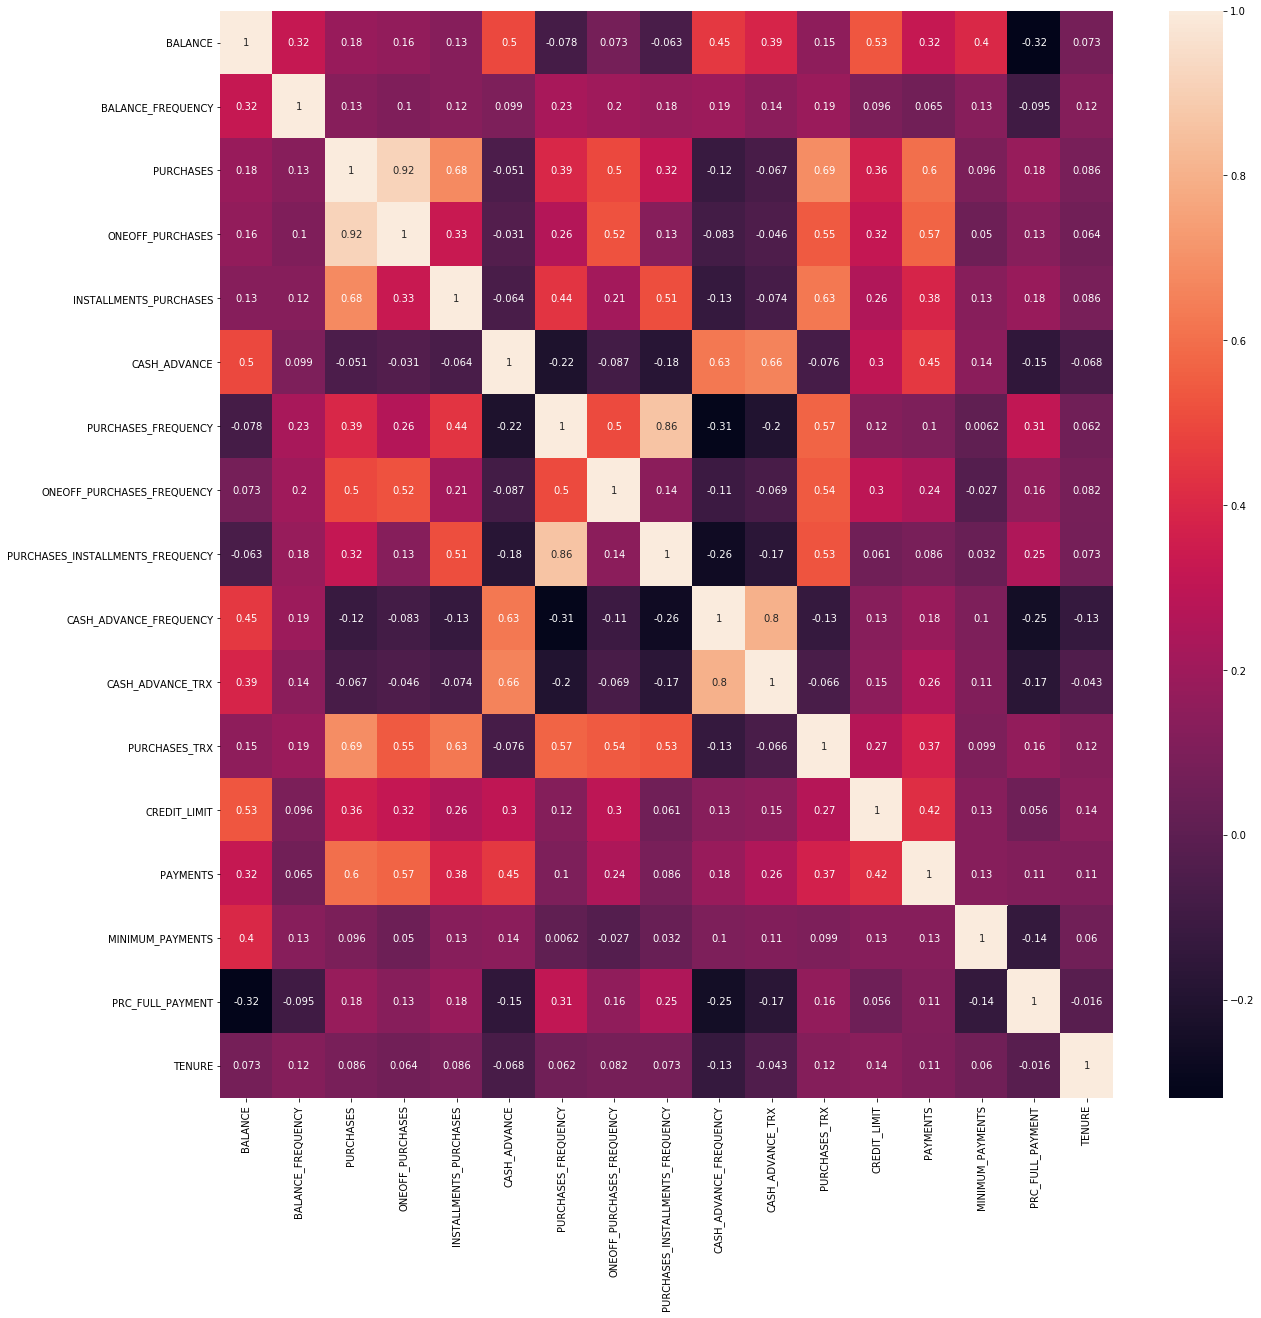

In [125]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [126]:
data = df.copy()
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [127]:
#drop the customer ID as it is unique and not needed
data.drop(columns='CUST_ID', inplace=True)

In [128]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Scaled

In [129]:
data = StandardScaler().fit_transform(data)
data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## Test Kmeans without PCA

In [130]:
distortion = []
ks = range(1,10)
for i in ks:
  kmean = KMeans(i)
  kmean.fit(data)
  distortion.append(kmean.inertia_)

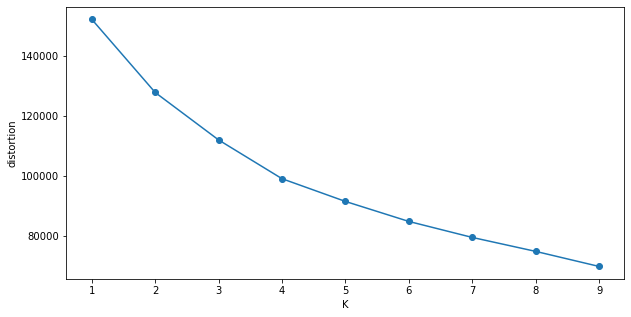

In [136]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(ks,distortion, marker='o')
plt.xlabel('K')
plt.ylabel('distortion')
plt.show()

## PCA

In [137]:
pca = PCA().fit(data)

In [139]:
pca.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

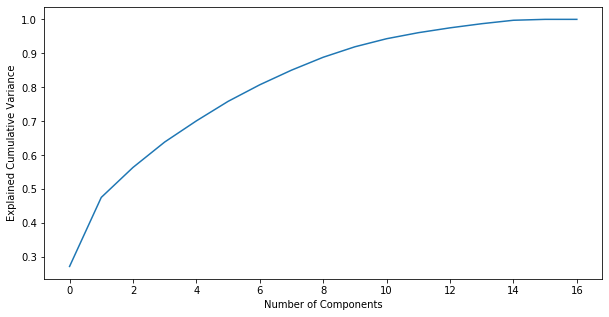

In [142]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Cumulative Variance')
plt.show()

## Choose K = 9 for PCA
#### K=9 covers 90 percent of the data

In [144]:
pca = PCA(n_components = 9)

X_pca = pca.fit_transform(data)
X_pca = pd.DataFrame(X_pca)

In [146]:
X_pca.head()

,0,1,2,3,4,5,6,7,8
0,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336
1,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472
2,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803
3,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245
4,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032


In [239]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [238]:
!pip install kneed

In [241]:
#Get Optimal Epsilon
def opt_eps(data, neighors_num):
  neigh = NearestNeighbors(n_neighbors=neighors_num)
  nbrs = neigh.fit(data)
  
  distances, indices = nbrs.kneighbors(data)

  distances = np.sort(distances[:,neighors_num-1], axis=0)
  
  i = np.arange(len(distances))
  knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
  
  fig = plt.figure(figsize=(5,5))
  knee.plot_knee()
  plt.xlabel('Points')
  plt.ylabel('Distance')
  
  print('The Knee is at eps: ')
  print(distances[knee.knee]) 

The Knee is at eps: 
2.375484752332659


<Figure size 360x360 with 0 Axes>

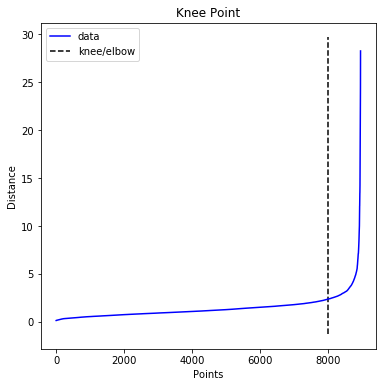

In [242]:
opt_eps(X_pca, 50)

In [226]:
dbscan(X_pca,0.6,50)

-0.12322963942013646

In [244]:
dbscan(X_pca,2.375484752332659,50)

0.5538345460305854

In [229]:
dbscan(X_pca,3,10)

0.6770424752661499

In [204]:
dbscan(X_pca,15,100)

0.863528921945336

In [230]:
km_sc = []
db_sc = []
heirar_sc = []
gauss_sc = []

#function that applies methods
def apply_methods(X_data):
  #apply all methods
  for i in range(2,7):
    #dbscan
    db_sc.append(dbscan(X_data,3,10))
    #kmeans
    km_sc.append(kmeans(X_data,i))
    #hierarchical
    heirar_sc.append(hierar(X_data, i))
    #gaussian mixture
    gauss_sc.append(gauss(X_data, i))

In [231]:
apply_methods(X_pca)

#These are the optimal clusters num
max_km = km_sc.index(max(km_sc))+2
max_db = db_sc.index(max(db_sc))+2
max_heirar = heirar_sc.index(max(heirar_sc))+2
max_gauss = gauss_sc.index(max(gauss_sc))+2

#The indexes corresponding to maximum clusters
idx_km = max_km-2
idx_db = max_db-2
idx_h = max_heirar-2
idx_gauss = max_gauss-2

print(f'The optimal clusters number for kmeans is: {max_km} with a silhouette score of: {km_sc[idx_km]}')
print(f'The optimal clusters number for DBSCAN is: {max_db} with a silhouette score of: {db_sc[idx_db]}')
print(f'The optimal clusters number for Hierarchical is: {max_heirar} with a silhouette score of: {heirar_sc[idx_h]}')
print(f'The optimal clusters number for gaussian mixture is: {max_gauss} with a silhouette score of: {gauss_sc[idx_gauss]}')

The optimal clusters number for kmeans is: 3 with a silhouette score of: 0.2622587623562618
The optimal clusters number for DBSCAN is: 2 with a silhouette score of: 0.6770424752661499
The optimal clusters number for Hierarchical is: 2 with a silhouette score of: 0.37634233909509435
The optimal clusters number for gaussian mixture is: 2 with a silhouette score of: 0.18064866267737908


In [232]:
c1 = np.array(km_sc)
c2 = np.array(db_sc)
c3 = np.array(heirar_sc)
c4 = np.array(gauss_sc)


arr = np.column_stack((c1,c2,c3,c4))
arr

array([[0.2295665 , 0.67704248, 0.37634234, 0.18064866],
       [0.26225876, 0.67704248, 0.20089577, 0.08131114],
       [0.22378496, 0.67704248, 0.13666558, 0.07239418],
       [0.21545654, 0.67704248, 0.14156024, 0.03661418],
       [0.23113459, 0.67704248, 0.15529106, 0.038378  ]])

In [233]:
observations =  pd.DataFrame({'KMEANS': arr[:, 0], 'DBSCAN': arr[:, 1], 'Hierarchical': arr[:, 2], 'Gaussian': arr[:, 3]})
observations

,KMEANS,DBSCAN,Hierarchical,Gaussian
0,0.229567,0.677042,0.376342,0.180649
1,0.262259,0.677042,0.200896,0.081311
2,0.223785,0.677042,0.136666,0.072394
3,0.215457,0.677042,0.141560,0.036614
4,0.231135,0.677042,0.155291,0.038378


In [234]:
observations = observations.rename(index={0:'2', 1:'3', 2:'4', 3:'5', 4:'6'})
observations

,KMEANS,DBSCAN,Hierarchical,Gaussian
2,0.229567,0.677042,0.376342,0.180649
3,0.262259,0.677042,0.200896,0.081311
4,0.223785,0.677042,0.136666,0.072394
5,0.215457,0.677042,0.141560,0.036614
6,0.231135,0.677042,0.155291,0.038378
